In [46]:
import pandas as pd

In [47]:
br = pd.read_csv("BitalinoBR.txt", delimiter="\t", header=None, names=["BR", "timestamp", "label"]) 
ecg = pd.read_csv("BitalinoECG.txt", delimiter="\t", header=None, names=["ECG", "timestamp", "label"]) 
gsr = pd.read_csv("BitalinoGSR.txt", delimiter="\t", header=None, names=["GSR", "timestamp", "label"])

In [48]:
for df in [br, ecg, gsr]: 
    df["timestamp"] = pd.to_numeric(df["timestamp"]) 
    df.sort_values("timestamp", inplace=True)

In [49]:
df.head()

,GSR,timestamp,label
0,2.235327,112755.578,Raw
1,2.235327,112755.594,Raw
2,2.235327,112755.599,Raw
3,2.235327,112755.605,Raw
4,2.287272,112755.624,Raw


In [50]:
triggers = pd.read_csv("Triggers.txt", delimiter="\t", header=None, names=["event", "start", "end"])

In [51]:
triggers["start"] = pd.to_numeric(triggers["start"]) 
triggers["end"] = pd.to_numeric(triggers["end"])

In [52]:
df = pd.merge_asof(br, ecg, on="timestamp", direction="nearest", suffixes=("", "_ecg"))

In [53]:
df = pd.merge_asof(df, gsr, on="timestamp", direction="nearest", suffixes=("", "_gsr"))

In [54]:
df = df[["timestamp", "BR", "ECG", "GSR"]]

In [55]:
# Define the function to assign an event based on timestamp
def assign_event(ts, trig_df):
    # Iterate through each row in the trigger dataframe
    for _, row in trig_df.iterrows():
        # Check if the timestamp falls within the start and end time of an event
        if row["start"] <= ts <= row["end"]:
            return row["event"]  # Return the event name if condition is met
    return "INTERVALS"  # Return None if no event matches

# Apply the function to assign events to each timestamp in the dataset
df["event"] = df["timestamp"].apply(lambda x: assign_event(x, triggers))


In [91]:
overall_stats = df[["BR", "ECG", "GSR",]].describe() 
print("Overall Statistics:") 
print(overall_stats)

Overall Statistics:
                  BR            ECG            GSR
count  224605.000000  224605.000000  224605.000000
mean       -2.721336      -0.017990      14.728510
std        18.027708       0.274952       4.014361
min       -49.902344      -1.479492       0.728927
25%       -12.500000      -0.120117      13.715131
50%        -3.417969      -0.046875      15.377365
75%         6.738281       0.023438      16.520151
max        49.609375       1.497070      29.090796


In [57]:
event_stats = df.groupby("event")[["BR", "ECG", "GSR"]].describe() 
print("\nStatistics by Event:") 
print(event_stats)


Statistics by Event:
                BR                                                        \
             count      mean        std        min        25%        50%   
event                                                                      
CLIP-1      5996.0 -4.541569  22.605537 -48.925781 -18.554688  -9.082031   
CLIP-10     5919.0 -1.550357  12.570011 -33.398438  -9.667969  -3.320312   
CLIP-11     6103.0 -0.147644  20.544306 -45.996094 -14.843750  -0.878906   
CLIP-12     6103.0 -2.613469  21.738181 -49.902344 -15.527344  -2.539062   
CLIP-13     6110.0 -0.327668  19.261353 -46.679688 -12.597656  -2.441406   
CLIP-14     6103.0 -1.636154  18.291056 -45.996094 -13.183594  -1.855469   
CLIP-15     6000.0 -2.937646  16.397225 -42.675781 -12.695312  -3.027344   
CLIP-16     5996.0 -1.300688  19.042798 -38.769531 -14.477539  -0.976562   
CLIP-2      6101.0 -3.519851  17.112332 -49.609375  -9.863281  -3.027344   
CLIP-3      5802.0 -3.112545  14.189902 -48.632812 -11.914062  -3.

# Descriptive Analysis

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [60]:
%matplotlib inline

In [61]:
mean_vals = df[["BR", "ECG", "GSR"]].mean() 
median_vals = df[["BR", "ECG", "GSR"]].median() 
mode_vals = df[["BR", "ECG", "GSR"]].mode().iloc[0] # In case there are multiple modes, select the first row

print("Mean values:") 
print(mean_vals) 
print("\nMedian values:") 
print(median_vals) 
print("\nMode values:") 
print(mode_vals)

Mean values:
BR     -2.721336
ECG    -0.017990
GSR    14.728510
dtype: float64

Median values:
BR     -3.417969
ECG    -0.046875
GSR    15.377365
dtype: float64

Mode values:
BR     -2.441406
ECG    -0.046875
GSR    15.221530
Name: 0, dtype: float64


In [62]:
range_vals = df[["BR", "ECG", "GSR"]].max() - df[["BR", "ECG", "GSR"]].min() 
variance_vals = df[["BR", "ECG", "GSR"]].var() 
std_vals = df[["BR", "ECG", "GSR"]].std() 
iqr_vals = df[["BR", "ECG", "GSR"]].quantile(0.75) - df[["BR", "ECG", "GSR"]].quantile(0.25)

print("\nRange values:") 
print(range_vals) 
print("\nVariance values:") 
print(variance_vals) 
print("\nStandard Deviation values:") 
print(std_vals) 
print("\nInterquartile Range (IQR) values:") 
print(iqr_vals)


Range values:
BR     99.511719
ECG     2.976562
GSR    28.361868
dtype: float64

Variance values:
BR     324.998243
ECG      0.075599
GSR     16.115091
dtype: float64

Standard Deviation values:
BR     18.027708
ECG     0.274952
GSR     4.014361
dtype: float64

Interquartile Range (IQR) values:
BR     19.238281
ECG     0.143555
GSR     2.805020
dtype: float64


In [63]:
missing_count = df.isnull().sum() 
print("\nMissing Values Count:") 
print(missing_count)


Missing Values Count:
timestamp    0
BR           0
ECG          0
GSR          0
event        0
dtype: int64


In [64]:
event_counts = df["event"].value_counts(dropna=False) 
print("\nEvent Frequency Counts:") 
print(event_counts)


Event Frequency Counts:
event
INTERVALS    90948
REST         30101
CLIP-DEMO     7001
CLIP-8        6138
CLIP-13       6110
CLIP-12       6103
CLIP-14       6103
CLIP-11       6103
CLIP-2        6101
CLIP-4        6100
CLIP-6        6080
CLIP-9        6061
CLIP-7        6000
CLIP-15       6000
CLIP-1        5996
CLIP-16       5996
CLIP-5        5943
CLIP-10       5919
CLIP-3        5802
Name: count, dtype: int64


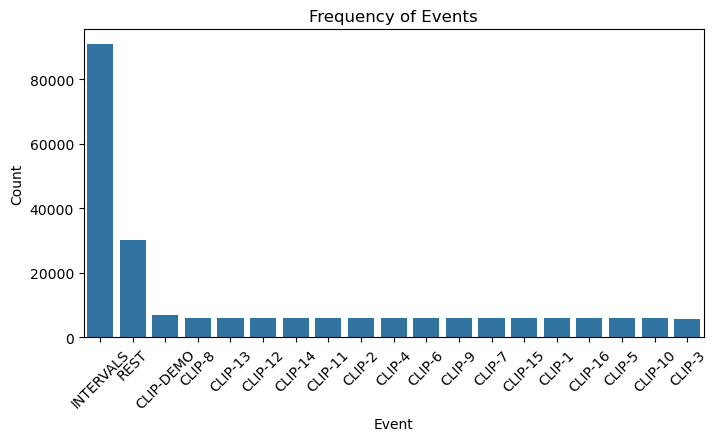

In [65]:
plt.figure(figsize=(8, 4)) 
sns.barplot(x=event_counts.index.astype(str), y=event_counts.values)
plt.title("Frequency of Events") 
plt.xlabel("Event") 
plt.ylabel("Count") 
plt.xticks(rotation=45) 
plt.show()

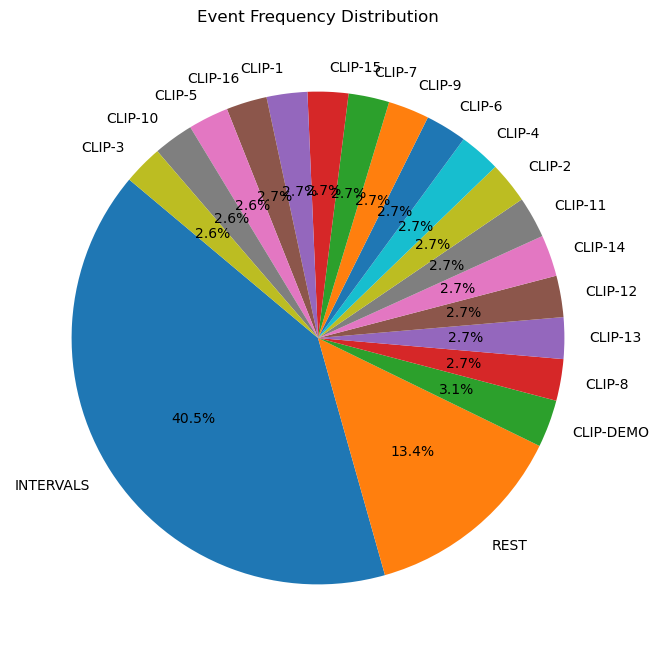

In [66]:
plt.figure(figsize=(8, 8)) 
plt.pie(event_counts.values, labels=event_counts.index.astype(str), autopct='%1.1f%%', startangle=140) 
plt.title("Event Frequency Distribution") 
plt.show()

In [67]:
df.to_csv("merged_sensor_data.csv", index=False)

In [93]:
df.describe

<bound method NDFrame.describe of          timestamp         BR       ECG        GSR      event
0       112755.578  -3.320312 -0.055664   2.235327  INTERVALS
1       112755.594  -3.710938 -0.014648   2.235327  INTERVALS
2       112755.599  -4.003906  0.005859   2.235327  INTERVALS
3       112755.605  -4.296875  0.023438   2.235327  INTERVALS
4       112755.624  -4.589844  0.035156   2.287272  INTERVALS
...            ...        ...       ...        ...        ...
224600  120521.596  25.000000 -0.178711  18.701833  INTERVALS
224601  120521.611  25.292969 -0.166992  18.701833  INTERVALS
224602  120521.710   1.074219 -0.038086  19.117392  INTERVALS
224603  120521.810   1.660156 -0.055664  19.117392  INTERVALS
224604  120521.920   2.343750 -0.061523  19.117392  INTERVALS

[224605 rows x 5 columns]>